# Monitor fields on each side of a box

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole, showing how to measure fields on each of the six sides of a given box.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [4]:
# set up parameters of simulation
dl=0.01
pml = td.PML(num_layers=10)
sim_size = [4, 4, 4]
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 10.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# Monitor settings
mon_size = (2.0, 3.0, 1.0)
mon_center = (0, 0.5, 1.0)

# Create a box monitor for frequency-domain fields
monitor_freq = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=mon_center,
    size=mon_size,
    freqs=[freq0],
    name='field_freq')

# Create a box monitor for time-domain fields
monitor_time = td.FieldTimeMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=mon_center,
    size=mon_size,
    start=1e-13,
    stop=2e-13,
    interval=100,
    name='field_time')

# Get a list of frequency-domain monitors for each surface of the box
all_monitors = monitor_freq.surfaces()

# Append the list of time-domain monitors for each surface of the box
all_monitors.extend(monitor_time.surfaces())

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources=[source],
                    monitors=all_monitors,
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

In [6]:
# Run the simulation, or load existing data
data = web.run(sim, task_name='surface_monitors', path='data/data.hdf5')
# data = web.load('8d911136-1fd4-4336-ad4a-be4cf89338a9', sim, path='data/data.hdf5')


[15:17:08] INFO     Uploaded task 'surface_monitors' with task_id               ]8;id=941174;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=235943;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#110\110]8;;\
                    '0ac6e8ac-a4cf-41d1-8d28-f7266b89d21d'.                                  

Output()

[15:17:09] status = queued                                                      ]8;id=749284;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=898472;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[15:17:28] status = preprocess                                                  ]8;id=569693;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=262301;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[15:17:54] status = running                                                     ]8;id=832878;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=340053;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[15:25:48] status = postprocess                                                 ]8;id=109850;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=930139;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[15:26:18] status = visualize                                                   ]8;id=281630;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=47074;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[15:26:27] status = success                                                     ]8;id=309451;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=647793;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[15:26:28] INFO     downloading file "monitor_data.hdf5" to "data/data.hdf5"    ]8;id=322000;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=27302;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#523\523]8;;\

Output()

[15:30:53] INFO     loading SimulationData from data/data.hdf5                  ]8;id=426691;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=9471;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#347\347]8;;\

In [7]:
print(data.log)

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 1.9247e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17
Compute source modes time (s):     0.0695
Compute monitor modes time (s):    0.1008

Rest of setup time (s):            2.4303

Starting solver...
- Time step    769 / time 1.33e-14s (  4 % done), field decay: 1.00e+00
- Time step   1531 / time 2.65e-14s (  7 % done), field decay: 1.00e+00
- Time step   1539 / time 2.67e-14s (  8 % done), field decay: 1.00e+00
- Time step   2309 / time 4.00e-14s ( 12 % done), field decay: 2.52e-01
- Time step   3079 / time 5.34e-14s ( 16 % done), field decay: 6.69e-02
- Time step   3849 / time 6.67e-14s ( 20 % done), field decay: 2.67e-02
- Time step   4619 / time 8.01e-14s ( 24 % done), field decay: 1.17e-02
- Time step   5389 / time 9.34e-14s ( 28 % done), field decay: 9.21e-03
- Time step   6159 / time 1

/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Figure size 720x720 with 12 Axes>

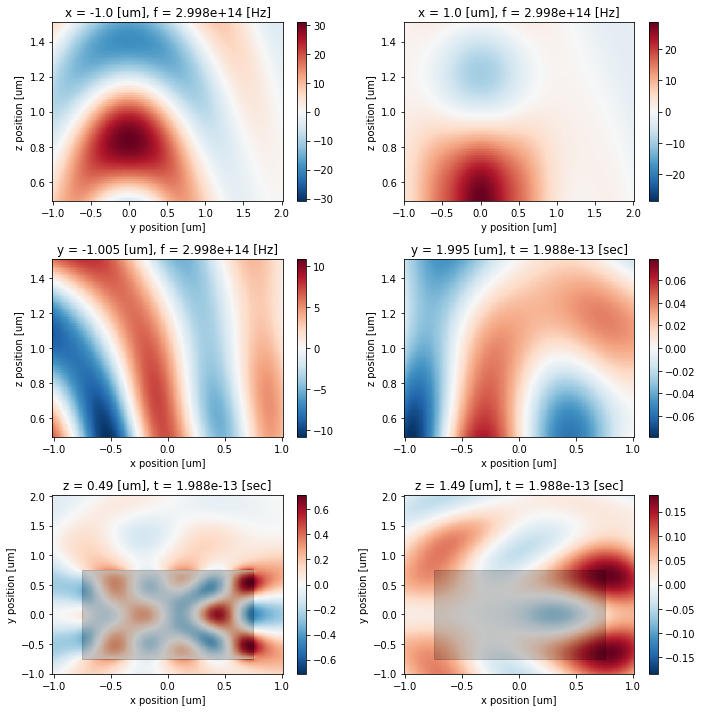

In [8]:
# Plot fields on each surface of the box

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 10)

# Plot frequency-domain fields at some of the surface monitors
data.plot_field(field_monitor_name='field_freq_x-', field_name='Ey', x=-mon_size[0]/2.0, val='real', freq=freq0, ax=axs[0][0])
data.plot_field(field_monitor_name='field_freq_x+', field_name='Ey', x=mon_size[0]/2.0, val='real', freq=freq0, ax=axs[0][1])
data.plot_field(field_monitor_name='field_freq_y-', field_name='Ey', y=-mon_size[1]/2.0, val='real', freq=freq0, ax=axs[1][0])

# Plot time-domain fields at some of the surface monitors
data.plot_field(field_monitor_name='field_time_y+', field_name='Ey', y=mon_size[1]/2.0, val='real', time=2e-13, ax=axs[1][1])
data.plot_field(field_monitor_name='field_time_z-', field_name='Ey', z=-mon_size[2]/2.0, val='real', time=2e-13, ax=axs[2][0])
data.plot_field(field_monitor_name='field_time_z+', field_name='Ey', z=mon_size[2]/2.0, val='real', time=2e-13, ax=axs[2][1])

fig.tight_layout()